 #82=IfcAlignment('3nRMg5fcH8NOU1Ds8sY5bq',$,'Dummy',$,$,#81,#91,$)
   #75=IfcAlignmentHorizontal('0HPhcNfH9BCODUiU0b9pwZ',$,'Dummy - Horizontal',$,$,$,$)
     #11=IfcAlignmentSegment('1AwnhEl5r4ZQCwC$B4cgMV',$,'H1',$,$,#81,#93,#10)
     #21=IfcAlignmentSegment('0NuzF6gNv3vvP39ylUETPS',$,'H2',$,$,#81,#95,#20)
   #77=IfcAlignmentVertical('1TbdFVsA1CbQ14po9YpHpZ',$,'Dummy - Vertical',$,$,$,$)
     #32=IfcAlignmentSegment('38IuXMCOH30QBIdFCD9hMK',$,'V1',$,$,#81,#97,#31)
     #43=IfcAlignmentSegment('2JklN5b3vDRxX5DbpQG0e8',$,'V2',$,$,#81,#99,#42)
     #54=IfcAlignmentSegment('3$FTvAoljDauK3dfsw0700',$,'V3',$,$,#81,#101,#53)
     #65=IfcAlignmentSegment('0qPl4XLDT6LAwclkF9K7lP',$,'V4',$,$,#81,#103,#64)
   #86=IfcReferent('0H6JLZuwr2J9887QxQ$avA',$,'Start Station',$,$,#85,$,.STATION.)
#74=IfcGradientCurve((#40,#51,#62,#73),.F.,#29,$)
#62=IfcCurveSegment(.CONTSAMEGRADIENTSAMECURVATURE.,#61,IfcLengthMeasure(0.),IfcLengthMeasure(40.),#58)
#61=IfcAxis2Placement2D(#59,#60)
#59=IfcCartesianPoint(

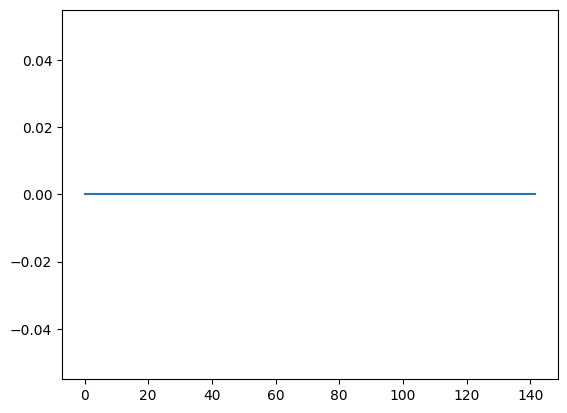

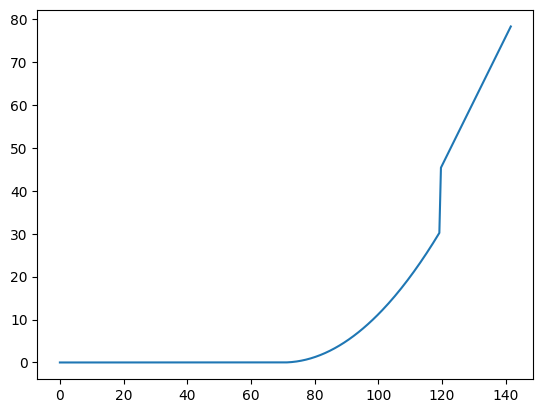

In [12]:
import ifcopenshell
import ifcopenshell.api
from ifcopenshell.api import run
import ifcopenshell.alignment
import numpy as np
import matplotlib.pyplot as plt

model = ifcopenshell.file(schema="IFC4X3_ADD2")

project = run("root.create_entity", model, ifc_class="IfcProject", name="Dummy")

geometric_representation_context = run("context.add_context",model,context_type="Model")
axis_model_representation_subcontext = model.createIfcGeometricRepresentationSubContext(
    ContextIdentifier="Axis",
    ContextType="Model",
    ParentContext=geometric_representation_context,
    TargetView="MODEL_VIEW")

fig1 = plt.figure().add_subplot()
fig2 = plt.figure().add_subplot()

#coordinates = [(0.0,0.0),(100.0,0.0),(200.0,200.0)]
#radii = [(50.0)]

coordinates = [(0.0,0.0),(500.0,0.0)]
radii = []
vpoints = [(0.0,0.0),(100.0,0.0),(200.0,150.0)]
lengths = [(60.)]

#coordinates = [(500.,2500.),(3340.0,  660.0),(4340.0, 5000.0),(7600.0, 4560.0),(8480.0, 2010.0)]
#radii = [(1000.),(1250.),(950.)]
#vpoints = [(0.0,100.0),(2000.,135.0),(5000.,105.),(7400.,153.),(9800.,105.),(12800.,90.)]
#lengths = [(1600.),(1200.),(2000.),(800.)]

helper = ifcopenshell.alignment.IfcAlignmentHelper(model)
alignment = helper.create_alignment_by_pi_method("Dummy",coordinates,radii,vpoints,lengths)
ifcopenshell.alignment.print_structure(alignment)
curve = alignment.Representation.Representations[0].Items[0]
print(curve)
#curve = model.by_type("IfcCompositeCurve")[0] # because helper returns Nothing
s = ifcopenshell.geom.settings()

shape = ifcopenshell.geom.create_shape(s,curve)
verts = shape.verts
verts = np.array(verts).reshape((-1,3))
x,y,z = verts.T
fig1.plot(x,y)

evaluator = ifcopenshell.ifcopenshell_wrapper.function_item_evaluator(s,ifcopenshell.ifcopenshell_wrapper.map_shape(s,curve.wrapped_data))
distances = evaluator.evaluation_points()
fig2.plot(distances,z)

print(model.by_id(62))
print(model.by_id(61))
print(model.by_id(59))
print(model.by_id(60))